In [1]:
import alborexdata
import numpy as np
import os
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import rcParams
from geopy.distance import vincenty
from mpl_toolkits.basemap import Basemap
rcParams.update({'font.size': 20})

In [2]:
datadir = "/home/ctroupin/Data/IRENE/"
figdir = "/home/ctroupin/Data/IRENE/figures/"
datafile = os.path.join(datadir, "RV/dep0040_socib-rv_scb-tsl001_L1_2017-07-19_HR.nc")
if not os.path.exists(figdir):
    os.makedirs(figdir)

In [17]:
with netCDF4.Dataset(datafile, "r") as nc:
    lon = nc.variables["LON"][:]
    lat = nc.variables["LAT"][:]
    # Remove the nan values
    goodloc = np.logical_and(np.logical_not(np.isnan(lon)), 
                             np.logical_not(np.isnan(lat)))
    lon = lon[goodloc]
    lat = lat[goodloc]
    time = nc.variables["time"][goodloc]
    timeunits = nc.variables["time"].units
    temperature = nc.variables["WTR_TEM"][goodloc]
    salinity = nc.variables["SALT"][goodloc]
dates = netCDF4.num2date(time, timeunits)

In [18]:
time[1] - time[0]

10.0

Create projection according to data location

In [27]:
m = Basemap(llcrnrlon=-1.9, llcrnrlat=36., 
            urcrnrlon=-1.2, urcrnrlat=36.6, 
            projection='merc', resolution='c')

/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


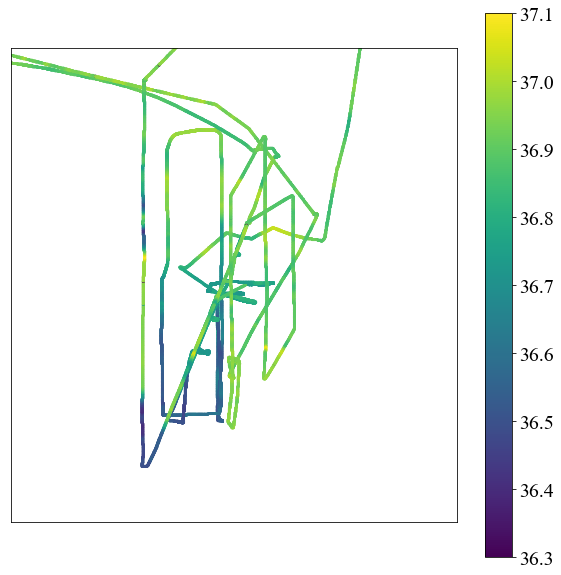

In [39]:
fig = plt.figure(figsize=(10, 10))
m.scatter(lon, lat, s=4, c=salinity, latlon=True, vmin=36.3, vmax=37.1)
plt.colorbar()
plt.show()
plt.close()